In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.model_selection import GridSearchCV


# 数据下载来源：https://www.kaggle.com/competitions/facebook-v-predicting-check-ins/data?select=train.csv.zip
# 新用户需要注册并手机号验证
# 读取数据
data = pd.read_csv("./data/FBLocation/train.csv")

data.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [3]:
# 数据的基本处理
# 1. 缩小数据的范围
# 使用pandas 中 query 函数完成数据集范围的缩小,query可以用类似sql的方式组合查询条件
data = data.query('x>1.0 & x<1.25 & y>2.5 & y<2.75')

# 2.删除不必要的信息，如时间戳 time
data = data.drop(['time'],axis=1)

print(data)

            row_id       x       y  accuracy    place_id
600            600  1.2214  2.7023        17  6683426742
957            957  1.1832  2.6891        58  6683426742
4345          4345  1.1935  2.6550        11  6889790653
4735          4735  1.1452  2.6074        49  6822359752
5580          5580  1.0089  2.7287        19  1527921905
...            ...     ...     ...       ...         ...
29100203  29100203  1.0129  2.6775        12  3312463746
29108443  29108443  1.1474  2.6840        36  3533177779
29109993  29109993  1.0240  2.7238        62  6424972551
29111539  29111539  1.2032  2.6796        87  3533177779
29112154  29112154  1.1070  2.5419       178  4932578245

[17710 rows x 5 columns]


In [4]:
place_counts = data.groupby("place_id").count()

In [5]:
place_counts
# 数值代表着每一个位置有多少个人签到，每一行的各列数值相等！

,row_id,x,y,accuracy
place_id,,,,
1012023972,1,1,1,1
1057182134,1,1,1,1
1059958036,3,3,3,3
1085266789,1,1,1,1
1097200869,1044,1044,1044,1044
...,...,...,...,...
9904182060,1,1,1,1
9915093501,1,1,1,1
9946198589,1,1,1,1


In [6]:
tf = place_counts[place_counts.row_id > 3].reset_index()
# 筛选出 签到数> 3的位置，并把筛选后的数据的索引重新设置

In [7]:
data = data[data["place_id"].isin(tf["place_id"])]

In [8]:
y = data['place_id']  # 目标值为 place_id，即入住的地点
x = data.drop(['place_id', 'row_id'], axis=1)  # 特征值，去除 place_id 和 row_id 列

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
transfer = StandardScaler()

x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

In [11]:
knn = knc(n_neighbors = 1)

# 通过训练集的特征值和目标值来拟合一个 k近邻分类器
knn.fit(x_train,y_train)

# 拟合完成后，分类器可以从测试集的特征值预测相应的目标值
y_predict = knn.predict(x_test)

print("预测测试集类别：", y_predict)
# 使用score返回给定测试数据和标签的平均准确度，前后两个参数就分别是测试集的特征值和目标值
print("准确率为：", knn.score(x_test, y_test))

预测测试集类别： [5035268417 6683426742 5606572086 ... 2327054745 8048985799 7175032540]
准确率为： 0.4087864460204886


In [12]:
p = []
for i in range(1,20):
   knn = knc(n_neighbors = i)
   knn.fit(x_train,y_train) 
   p.append(knn.score(x_test, y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

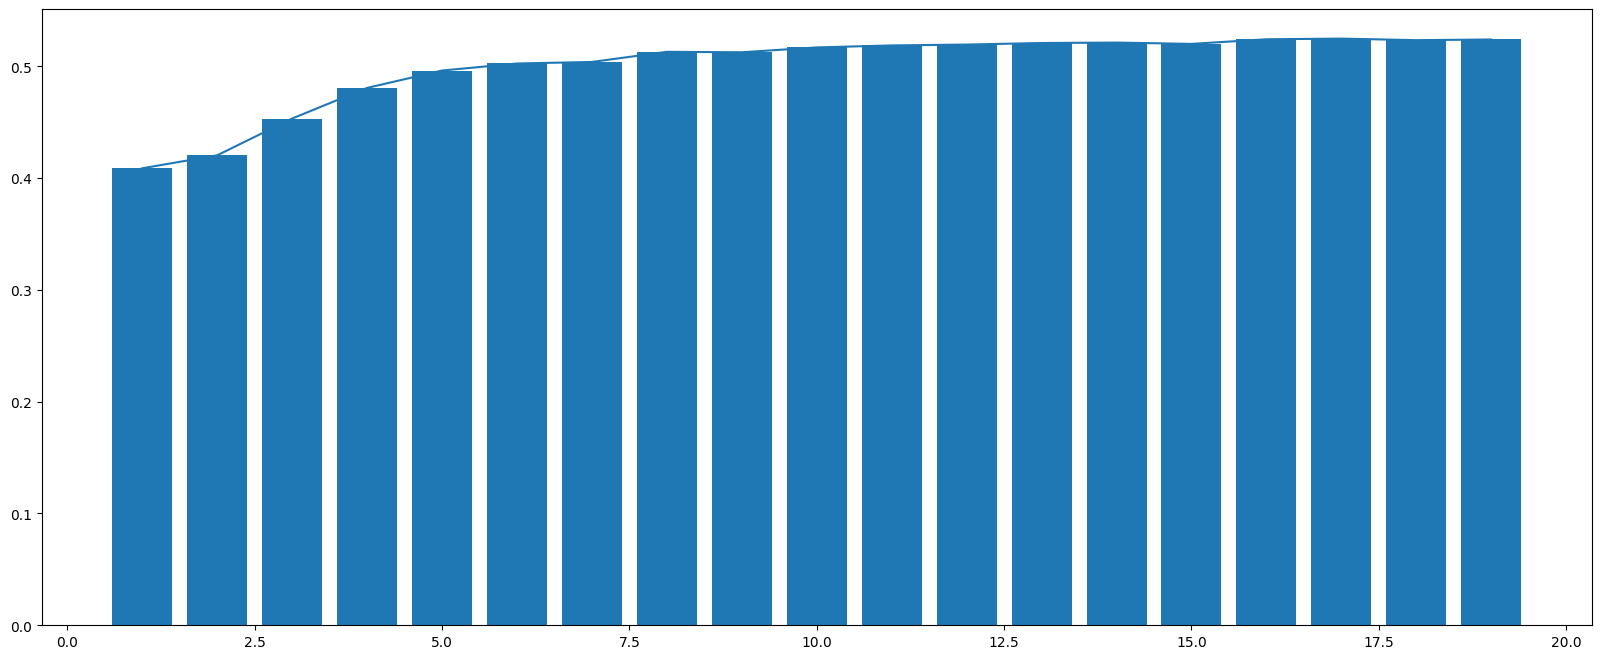

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8), dpi=100)
plt.bar(range(1,len(p)+1),p)
plt.plot(range(1,len(p)+1),p)
plt.show


In [14]:
knn = knc(n_neighbors = 130)

# 通过训练集的特征值和目标值来拟合一个 k近邻分类器
knn.fit(x_train,y_train)

# 拟合完成后，分类器可以从测试集的特征值预测相应的目标值
y_predict = knn.predict(x_test)

print("预测测试集类别：", y_predict)
# 使用score返回给定测试数据和标签的平均准确度，前后两个参数就分别是测试集的特征值和目标值
print("准确率为：", knn.score(x_test, y_test))

预测测试集类别： [2584530303 6683426742 5606572086 ... 2327054745 8048985799 6424972551]
准确率为： 0.48936170212765956


In [17]:
knn = knc()
param = {"n_neighbors": [3,5,10]}

gc = GridSearchCV(knn, param_grid=param, cv=2)
# 表示网格搜索估计器会对k近邻分类器以设定的k值[3,5,10]进行估计，并采用 2 折交叉验证，即把数据分成两组，并进行两次评估
gc.fit(x_train, y_train)

print("准确率：", gc.score(x_test, y_test))

print("交叉验证后最好的结果：", gc.best_score_)
print("gc选择的模型 k 值是：", gc.best_estimator_)
print("每次交叉验证的结果：", gc.cv_results_)

/Users/bacon_tesla/MLLearn/02-分类算法/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


准确率： 0.5169424743892829
交叉验证后最好的结果： 0.507177841580814
gc选择的模型 k 值是： KNeighborsClassifier(n_neighbors=10)
每次交叉验证的结果： {'mean_fit_time': array([0.00234544, 0.00154257, 0.00153995]), 'std_fit_time': array([6.18577003e-04, 4.69684601e-05, 4.69684601e-05]), 'mean_score_time': array([0.06297159, 0.06184411, 0.06514549]), 'std_score_time': array([0.00534129, 0.00116801, 0.00050068]), 'param_n_neighbors': masked_array(data=[3, 5, 10],
             mask=[False, False, False],
       fill_value=999999), 'params': [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 10}], 'split0_test_score': array([0.44350616, 0.48268874, 0.51004898]), 'split1_test_score': array([0.44299949, 0.47998649, 0.5043067 ]), 'mean_test_score': array([0.44325283, 0.48133761, 0.50717784]), 'std_test_score': array([0.00025334, 0.00135112, 0.00287114]), 'rank_test_score': array([3, 2, 1], dtype=int32)}
